In [2]:
import os
import json

import dgl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import torch

In [9]:
experiments = [
    'gat_x1',
    'gatv2_x1',
    'bert_x1',
    'roberta_x1',
    'roberta_x1_lr3.5',
    'twitter_roberta_x1',
    'twitter_roberta_x1_lr3.5',
    'joint_x1',
    'joint_roberta_x1',
    'joint_roberta_x1_lr3.5',
    'joint_twitter_roberta_x1',
    'joint_twitter_roberta_x1_lr3.5',
    'jointv2_x1',
    'jointv2_roberta_x1',
    'jointv2_roberta_x1_lr3.5',
    'jointv2_twitter_roberta_x1_lr3.5',
    'joint_x10',
    'jointv2_x10',
]

labels = [
    'GAT',
    'GATv2',
    'BERT',
    'RoBERTa (lr=5e-5)',
    'RoBERTa (lr=3.5e-5)',
    'TwitterRoBERTa (lr=5e-5)',
    'TwitterRoBERTa (lr=3.5e-5)',
    'GAT+Bert',
    'GAT+RoBERTa\n (lr=5.5e-5)',
    'GAT+RoBERTa\n (lr=3.5e-5)',
    'GAT+TwitterRoBERTa\n (lr=5.5e-5)',
    'GAT+TwitterRoBERTa\n (lr=3.5e-5)',
    'GATv2+BERT',
    'GATv2+RoBERTa\n (lr=5e-5)',
    'GATv2+RoBERTa\n (lr=3.5e-5)',
    'GATv2+TwitterRoBERTa\n (lr=3.5e-5)',
    'GAT+BERT',
    'GATv2+BERT'
]

assert(len(experiments) == len(labels))

baseline = ['joint_x10']
final_results = []

## Plotting for training and test metrics

In [10]:
data_x1 = []
data_x10 = []

for _, experiment in enumerate(experiments):
    print(f"Pulling data for experiment {experiment}...")
    file_path = f"../results/{experiment}_metrics.json"
    f = open(file_path)
    data = json.load(f)
    f.close()
    data = [*data.values()]
    if len(data) == 1:
        d_x1 = data[0]
        # print(data)
        d_x1 = {k:v for k,v in d_x1.items() if type(v) is list and len(v) > 0}
        data_x1.append(pd.DataFrame.from_dict(d_x1))
    else:
        d_x10 = [{k:v for k,v in d.items() if type(v) is list and len(v) > 0} for d in data]
        data_x10.append([pd.DataFrame.from_dict(d) for d in d_x10])
print(len(data_x1))
print(len(data_x10))

Pulling data for experiment gat_x1...
Pulling data for experiment gatv2_x1...
Pulling data for experiment bert_x1...
Pulling data for experiment roberta_x1...
Pulling data for experiment roberta_x1_lr3.5...
Pulling data for experiment twitter_roberta_x1...
Pulling data for experiment twitter_roberta_x1_lr3.5...
Pulling data for experiment joint_x1...
Pulling data for experiment joint_roberta_x1...
Pulling data for experiment joint_roberta_x1_lr3.5...
Pulling data for experiment joint_twitter_roberta_x1...
Pulling data for experiment joint_twitter_roberta_x1_lr3.5...
Pulling data for experiment jointv2_x1...
Pulling data for experiment jointv2_roberta_x1...
Pulling data for experiment jointv2_roberta_x1_lr3.5...
Pulling data for experiment jointv2_twitter_roberta_x1_lr3.5...
Pulling data for experiment joint_x10...
Pulling data for experiment jointv2_x10...
16
2


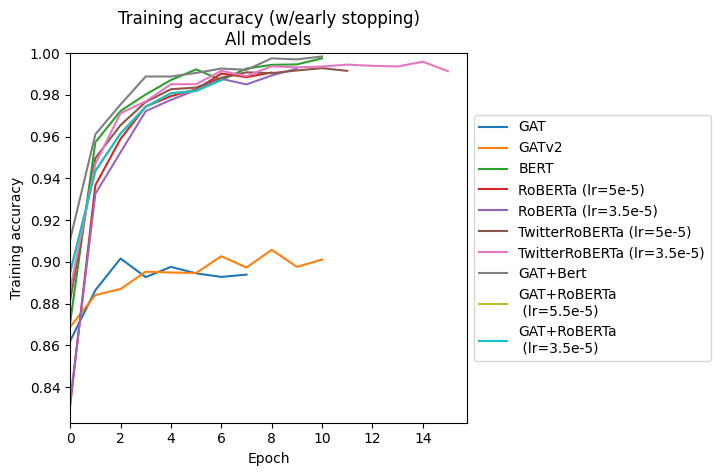

In [5]:
fig = plt.figure()
ax = plt.subplot(111)

sample = experiments[0:10]

for idx, experiment in enumerate(sample):
    d = data_x1[0:10][idx].train_acc
    ax.plot(d, label=labels[0:10][idx])

box =ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel('Epoch')
ax.set_xlim(0.0)
ax.set_ylabel('Training accuracy')
ax.set_ylim(top=1.0)
ax.set_title("Training accuracy (w/early stopping)\nAll models")

plt.savefig("../publish/images/training_acc_all.png", dpi=300)
plt.show()

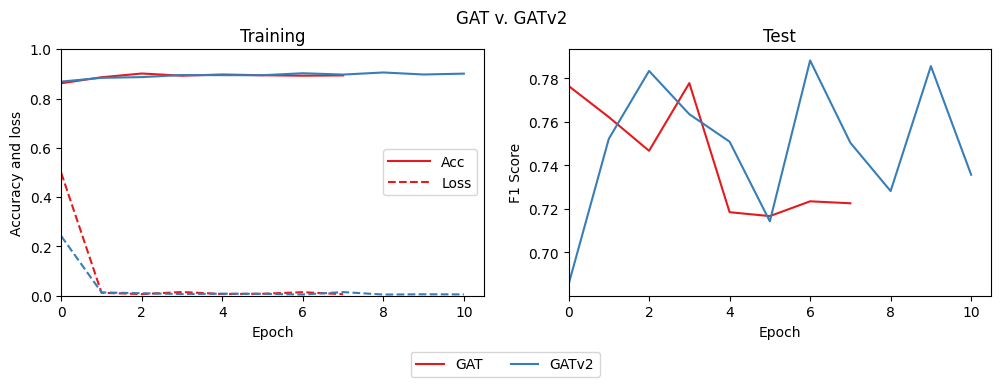

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

sample = experiments[0:2]

cmap = plt.get_cmap('Set1')
for idx, experiment in enumerate(sample):
    d = data_x1[0:2][idx]
    train_acc = d.train_acc
    ax1.plot(train_acc, color=cmap(idx))
    loss = d.train_loss
    ax1.plot(loss, color=cmap(idx), linestyle='dashed')
    # test_acc = d.test_acc
    # ax2.plot(test_acc, label=f"{labels[0:2][idx]} acc")
    f1 = d.test_f1
    ax2.plot(f1, color=cmap(idx), label=f"{labels[0:2][idx]}")


box =ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.2, box.width, box.height * 0.8])
box =ax2.get_position()
ax2.set_position([box.x0, box.y0 + box.height * 0.2, box.width, box.height * 0.8])
ax2.legend(loc='upper center', bbox_to_anchor=(-0.15, -0.2), ncol=2)
ax1.legend(["Acc", "Loss"], loc="center right", handlelength=3)
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_xlim(0.0)
ax2.set_xlim(0.0)
ax1.set_ylabel('Accuracy and loss')
ax2.set_ylabel('F1 Score')
ax1.set_ylim(0.0,1.0)
# ax2.set_ylim(top=1.0)
ax1.set_title("Training")
ax2.set_title("Test")
plt.suptitle("GAT v. GATv2")
plt.savefig("../publish/images/gat_v_gatv2.png", dpi=300)
plt.show()

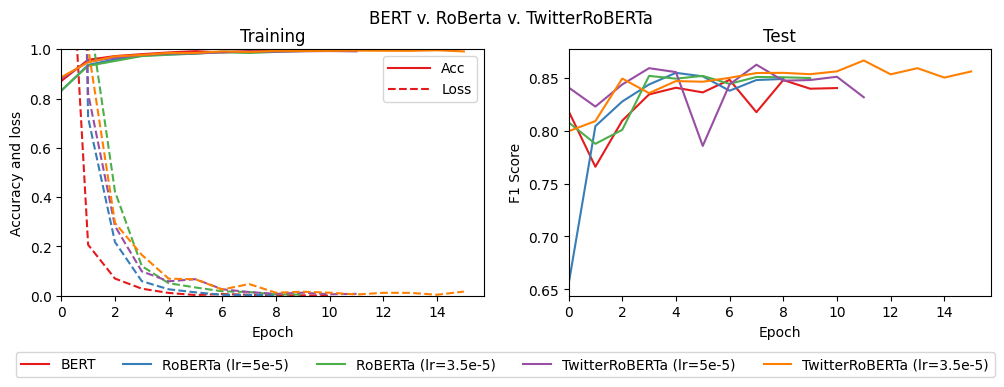

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

sample = experiments[2:7]

for idx, experiment in enumerate(sample):
    d = data_x1[2:7][idx]
    train_acc = d.train_acc
    ax1.plot(train_acc, color=cmap(idx), label=f"{labels[2:7][idx]}")
    loss = d.train_loss
    ax1.plot(loss,color=cmap(idx), linestyle='dashed')
    # test_acc = d.test_acc
    # ax2.plot(test_acc, label=f"{labels[2:6][idx]} acc")
    f1 = d.test_f1
    ax2.plot(f1, color=cmap(idx),label=f"{labels[2:7][idx]}")


box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.2, box.width, box.height * 0.8])
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + box.height * 0.2, box.width, box.height * 0.8])

ax2.legend(loc='upper center', bbox_to_anchor=(-0.15, -0.2), ncol=5)
ax1.legend(["Acc", "Loss"], handlelength=3)
# ax2.legend(loc='lower right')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_xlim(0.0)
ax2.set_xlim(0.0)
ax1.set_ylabel('Accuracy and loss')
ax2.set_ylabel('F1 Score')
ax1.set_ylim(0.0, 1.0)
# ax2.set_ylim(top=1.0)
ax1.set_title("Training")
ax2.set_title("Test")
plt.suptitle("BERT v. RoBerta v. TwitterRoBERTa")
plt.savefig("../publish/images/all_berts.png", dpi=300)
plt.show()

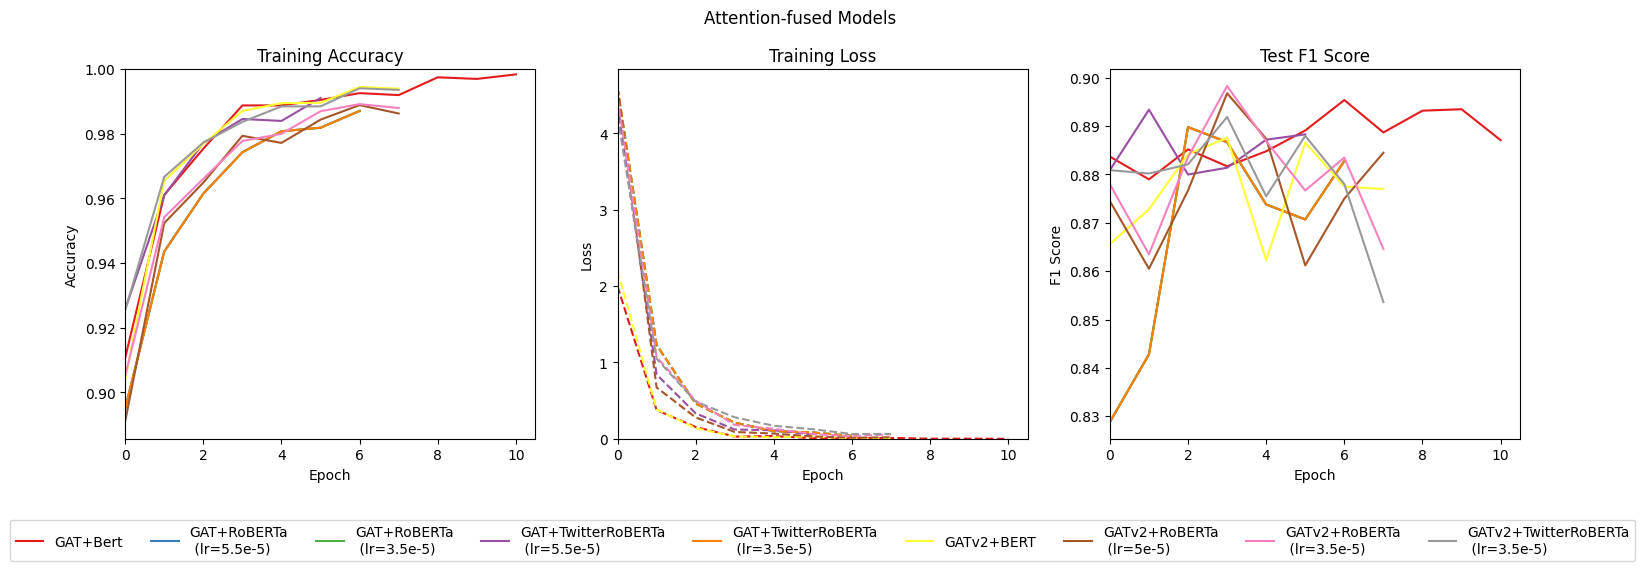

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))

sample = experiments[7:16]

for idx, experiment in enumerate(sample):
    d = data_x1[7:16][idx]
    train_acc = d.train_acc
    ax1.plot(train_acc, color=cmap(idx), label=f"{labels[7:16][idx]}")
    loss = d.train_loss
    ax2.plot(loss,color=cmap(idx), linestyle='dashed')
    # test_acc = d.test_acc
    # ax2.plot(test_acc, label=f"{labels[2:6][idx]} acc")
    f1 = d.test_f1
    ax3.plot(f1, color=cmap(idx),label=f"{labels[7:16][idx]}")


box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.2, box.width, box.height * 0.8])
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + box.height * 0.2, box.width, box.height * 0.8])
box = ax3.get_position()
ax3.set_position([box.x0, box.y0 + box.height * 0.2, box.width, box.height * 0.8])

ax1.legend(loc='upper center', bbox_to_anchor=(1.7, -0.2), ncol=9)
# ax1.legend(["Acc", "Loss"], handlelength=3)
# ax2.legend(loc='lower right')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax3.set_xlabel('Epoch')

ax1.set_xlim(0.0)
ax2.set_xlim(0.0)
ax3.set_xlim(0.0)

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
ax3.set_ylabel('F1 Score')
ax1.set_ylim(top=1.0)
ax2.set_ylim(bottom=0.0)
# ax3.set_ylim(top=1.0)

ax1.set_title("Training Accuracy")
ax2.set_title("Training Loss")
ax3.set_title("Test F1 Score")

plt.suptitle("Attention-fused Models")
plt.savefig("../publish/images/all_joint.png", dpi=300)
plt.show()

## Graph Attention Heatmap

```
    def attention_per_edge(self, example):
        logits, (edge_index, alpha) = self.forward(example, return_attention_weights=True)
        _, pred = logits.max(dim=1)

        return pred, alpha.cpu().detach().numpy(), edge_index.cpu().detach().numpy()
```

Code based on https://github.com/tech-srl/how_attentive_are_gats/blob/main/dictionary_lookup/experiment.py

In [50]:
import sys
sys.path.append(os.path.abspath('../'))

In [51]:
from dataloaders.graph_data import load_graph
from models.joint import GATV2

gatv2_path = os.path.join('../saved_models', 'gatv2_0_best.pt')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
checkpoint = torch.load(gatv2_path, map_location=device)

tweet_path = '../data/tweets.csv'
user_path = '../data/users.csv'
relationship_path = '../data/relationships.csv'
ts = 0.3
fm = 'soft'
fi = 'non_off'
num_labels = 2
args = dict()
args['hidden_size'] = 768

g, _, _, _ = load_graph(tweet_path, user_path, relationship_path, test_size=ts, feat_model=fm, feat_init=fi)
g = g.to(device)
features = g.ndata['features']
features_size = features.size()[1]
model = GATV2(fs=features_size, model_size=None, args=args, num_labels=num_labels)

model.load_state_dict(checkpoint['model_state_dict'])

Graph(num_nodes=1260, num_edges=10137,
      ndata_schemes={'features': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


<All keys matched successfully>

In [68]:
print(model)

GATV2(
  (gat): GATv2Layer(
    (layer1): GATv2Conv(
      (fc_src): Linear(in_features=2, out_features=6144, bias=True)
      (fc_dst): Linear(in_features=2, out_features=6144, bias=True)
      (feat_drop): Dropout(p=0.0, inplace=False)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (leaky_relu): LeakyReLU(negative_slope=0.2)
      (res_fc): Linear(in_features=2, out_features=6144, bias=True)
    )
  )
  (layer_norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (slf_attn): MultiHeadAttention(
    (w_qs): Linear(in_features=768, out_features=512, bias=False)
    (w_ks): Linear(in_features=768, out_features=512, bias=False)
    (w_vs): Linear(in_features=768, out_features=512, bias=False)
    (fc): Linear(in_features=512, out_features=768, bias=False)
    (attention): ScaledDotProductAttention(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (dropout): Dropout(p=0.1, inplace=False)
    (layer_norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  )
 

In [88]:
model.slf_attn.w_qs

Linear(in_features=768, out_features=512, bias=False)

In [91]:
def visualize_graph(labels, g):
    pos = nx.spring_layout(g, seed=1)
    plt.figure(figsize=(8,8))
    plt.axis('off')
    nx.draw_networkx(g, pos=pos, node_size=50, cmap=plt.get_cmap('coolwarm'), node_color=labels, edge_color='k',arrows=False, width=0.5, style='dotted', with_labels=False)


/run/media/cprimel/Data/cs6953-dl/graph-fusion-old/.venv/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


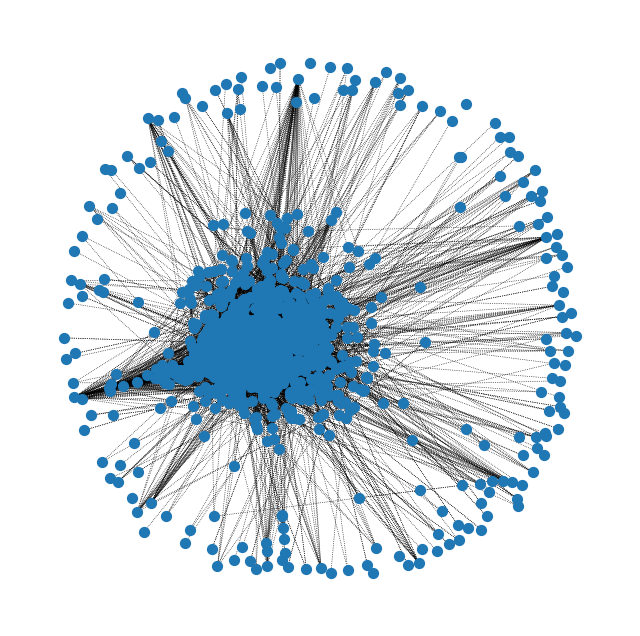

In [99]:
g = dgl.remove_self_loop(g)

nx_g = g.cpu().to_networkx()

visualize_graph(None, nx_g)

In [100]:
g.edata

{}